# Fake News Detection  

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
from functools import reduce
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_precision_recall_curve, plot_confusion_matrix


In [2]:
#Read the data
df=pd.read_csv('data/news.csv')

#Get shape and head
print(df.shape)
df.head()

(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
# Get the labels
y = df['label'].replace({'FAKE': 0, 'REAL': 1})

In [4]:
# Split the dataset 
x_train,x_test,y_train,y_test=train_test_split(df.text, y, test_size=0.2, random_state = 37)


In [5]:
#create frequency features
#tf-idf 
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.6)

# Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

## PassiveAggressiveClassifier

In [6]:
# Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(C = 0.3,max_iter=5000,random_state = 0)
pac.fit(tfidf_train,y_train)
y_pred=pac.predict(tfidf_test)
pac.score(tfidf_test,y_test)


0.9344909234411997

In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       629
           1       0.95      0.92      0.93       638

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



<AxesSubplot:>

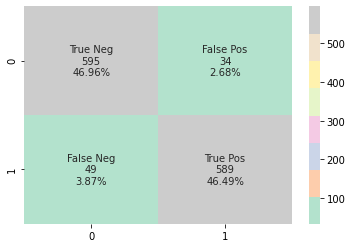

In [8]:
# Build confusion matrix
cf_matrix = confusion_matrix(y_test,y_pred, labels=[0,1])
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Pastel2')


## Logistic Regression

In [9]:
log_reg = LogisticRegression()
log_reg.fit(tfidf_train,y_train)
pred_logr = log_reg.predict(tfidf_test)
log_reg.score(tfidf_test,y_test)


0.9163378058405682

In [10]:
print(classification_report(y_test, pred_logr))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       629
           1       0.94      0.89      0.91       638

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



<AxesSubplot:>

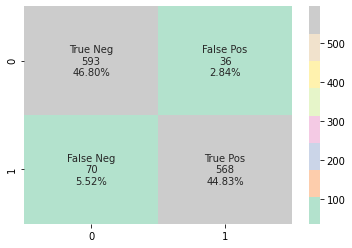

In [11]:
# Build confusion matrix
cf_matrix = confusion_matrix(y_test,pred_logr, labels=[0,1])
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Pastel2')

##  Decision Tree Classifier

In [12]:
dt = DecisionTreeClassifier(max_depth=50, random_state = 42)
dt.fit(tfidf_train, y_train)
pred_dt = dt.predict(tfidf_test)
dt.score(tfidf_test, y_test)

0.8271507498026835

In [13]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       629
           1       0.82      0.84      0.83       638

    accuracy                           0.83      1267
   macro avg       0.83      0.83      0.83      1267
weighted avg       0.83      0.83      0.83      1267



<AxesSubplot:>

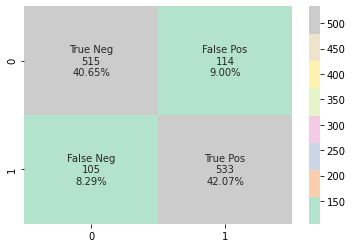

In [14]:
# Build confusion matrix
cf_matrix = confusion_matrix(y_test,pred_dt, labels=[0,1])
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Pastel2')

## Random Forest Classifier

In [15]:
rfc = RandomForestClassifier(n_estimators=90,random_state=42,class_weight ='balanced')
rfc.fit(tfidf_train, y_train)
pred_rfc = rfc.predict(tfidf_test)
rfc.score(tfidf_test, y_test)

0.9060773480662984

In [16]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       629
           1       0.90      0.91      0.91       638

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267



<AxesSubplot:>

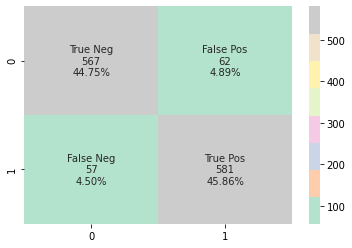

In [17]:
# Build confusion matrix
cf_matrix = confusion_matrix(y_test,pred_rfc, labels=[0,1])
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Pastel2')

## XGBClassifier

In [18]:
xgb = XGBClassifier(max_depth = 5, objective = 'binary:logistic', eval_metric = 'logloss', seed = 37,use_label_encoder=False)
xgb.fit(tfidf_train, y_train)
pred_xgb = xgb.predict(tfidf_test)
xgb.score(tfidf_test, y_test)

0.9226519337016574

In [19]:
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       629
           1       0.93      0.92      0.92       638

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



<AxesSubplot:>

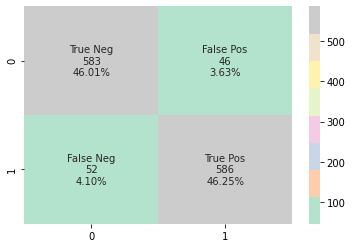

In [20]:
# Build confusion matrix
cf_matrix = confusion_matrix(y_test,pred_xgb, labels=[0,1])
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Pastel2')

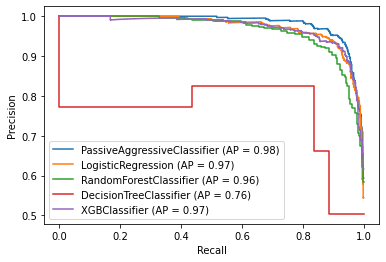

In [21]:
# Plot precison recall curve
classifiers = [pac,log_reg,rfc,dt,xgb]
ax = plt.gca()
for i in classifiers:
    plot_precision_recall_curve(i, tfidf_test, y_test, ax=ax)

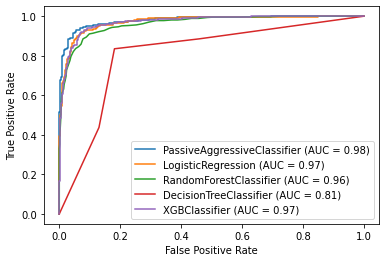

In [22]:
# Plot roc curve
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, tfidf_test, y_test, ax=ax)

In [35]:
def plot_cv_score(X, y, models_list, cv = 5, scoring_list = None, refit = True, return_scores = False):
       
    names = ['PassiveAggressiveClassifier',
             'Logistic Regression',
             'Random Forest Classifier',
             'Decision Tree Classifier',
             'XGBClassifier']
    mean_score =  list()
    ldf = list()
    mnames = list()
    
    for i, model in enumerate(models_list):
                         
        for metric in score_list:
            
            score = cross_val_score(model, X, y, cv = cv, scoring = metric, n_jobs= -1)
            mean_score.append(np.mean(score))

        tmp = pd.DataFrame({names[i]: mean_score}, index = score_list) 
            
        ldf.append(tmp)

        
        mean_score = list()
        
    frame_scores = reduce(lambda x,y: pd.merge(x,y, left_index = True, right_index = True), ldf).T   
    
    fig, ax  = plt.subplots(1,1, figsize = (10,5))

    frame_scores.plot.bar(ax = ax, cmap = 'RdYlBu', edgecolor = "black")
    ax.legend(loc = 'lower right')
    ax.set_xlabel("Score")
    ax.set_title("Cross validation model benchmark")
    plt.savefig('CV model benchmark.png',dpi=550)
    if return_scores:    
        return frame_scores

In [36]:
X  = tfidf_vectorizer.fit_transform(df.text) 
Y = df['label'].replace({'FAKE': 0, 'REAL': 1})

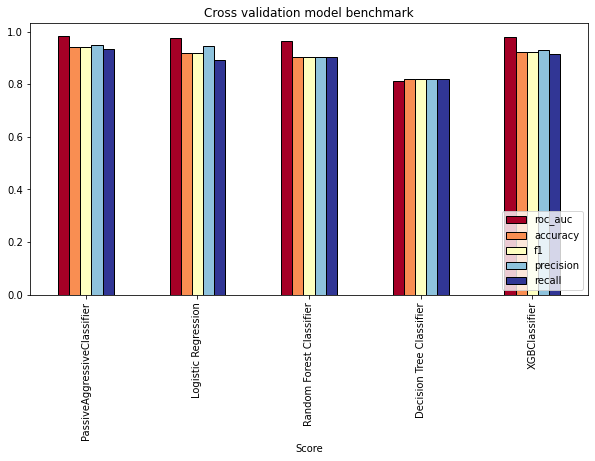

In [37]:
score_list = ["roc_auc", "accuracy", "f1", "precision", "recall"]
t = plot_cv_score(X = X, y = Y, models_list = classifiers, cv = 10, scoring_list = score_list)

LR: 0.916969 (0.010320)
PAC: 0.940331 (0.006892)
RFC: 0.903867 (0.002516)
DT: 0.813891 (0.009169)
XGB: 0.922652 (0.004967)


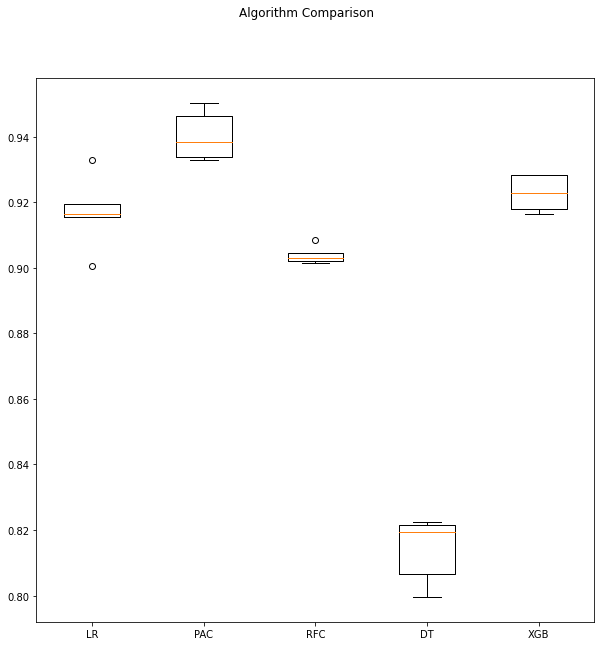

In [26]:
# Compare Algorithms

# prepare models
models = []
models.append(('LR', log_reg))
models.append(('PAC',pac))
models.append(('RFC',rfc))
models.append(('DT', dt))
models.append(('XGB', xgb))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits = 5, random_state= 37,shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    res = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(res)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(10,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

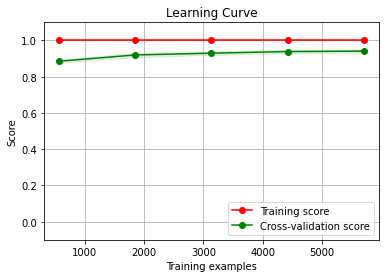

In [27]:
# after Compare we find best model which is PAC 

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state = 37)
train_sizes, train_scores, test_scores = learning_curve(pac,X, Y, n_jobs=-1, cv=cv, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

# plot the average training and test score lines at each training set size
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc='lower right')
plt.gca().invert_yaxis()
plt.ylim(-.1,1.1)
plt.show()

